<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bag-basics" data-toc-modified-id="Bag-basics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bag basics</a></span><ul class="toc-item"><li><span><a href="#Getting-the-data-and-creating-the-bag" data-toc-modified-id="Getting-the-data-and-creating-the-bag-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Getting the data and creating the bag</a></span></li><li><span><a href="#persist" data-toc-modified-id="persist-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><code>persist</code></a></span></li><li><span><a href="#filter" data-toc-modified-id="filter-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><code>filter</code></a></span></li><li><span><a href="#map" data-toc-modified-id="map-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><code>map</code></a></span></li><li><span><a href="#Using-map-and-predefined-functions" data-toc-modified-id="Using-map-and-predefined-functions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Using <code>map</code> and predefined functions</a></span></li><li><span><a href="#flatten" data-toc-modified-id="flatten-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span><code>flatten</code></a></span></li><li><span><a href="#compute" data-toc-modified-id="compute-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span><code>compute</code></a></span></li></ul></li></ul></div>

 # Bag basics
 
[Introduction to Dask, by Anderson Banihirwe](https://github.com/andersy005/dask-notebooks)

This notebook will introduce basic but essential `Dask.Bag` operations. At the same time we will introduce different concepts such as peristence in Dask.


## Getting the data and creating the bag



As we did in our first notebook, we will use the reduced dataset (10 percent) provided for the KDD Cup 1999, containing nearly half million network interactions. The file is provided as a Gzip file that we will download locally.

If you previously downloaded this dataset, the following program won't download it again. 

In [1]:
import urllib.request
import os
import pathlib
DATASET_DIR = pathlib.Path('../data')
DATASET_FILEPATH = pathlib.Path('../data/kddcup.data_10_percent.gz')
if not DATASET_DIR.exists():
    os.mkdir(DATA_DIR)
    f = urllib.request.urlretrieve(
        "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz",
        DATASET_FILEPATH)

Now we can use this file to create our dask bag.

In [2]:
import dask
import dask.bag as db
# Progress Bar
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [3]:
raw_data = db.read_text(DATASET_FILEPATH)

In [4]:
# Take a look at a few elements
raw_data.take(2)

[########################################] | 100% Completed |  0.1s


('0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.\n',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.\n')

In [5]:
raw_data

dask.bag<bag-fro..., npartitions=1>

## `persist`

It is often ideal to load, filter, and shuffle data once and keep this result in memory. Afterwards each of the several complex queries can be based off of this in-memory data rather than have to repeat the full load-filter-shuffle process each time. To do this, we can use `.persist()` method to tell dask to persist the data in memory. 


In [6]:
raw_data.persist()

[########################################] | 100% Completed | 11.6s


dask.bag<bag-fro..., npartitions=1>

## ```filter```


This method can be applied to bags in order to keep just elements that satisfy a certain condition. More concretely, a function is evaluated on every element in the original bag. The new resulting bag will contain just those elements that make the function return True.

For example, imagine we want to count how many normal. interactions we have in our dataset. We can filter our raw_data bag as follows.



In [7]:
normal_raw_data = raw_data.filter(lambda x: 'normal' in x)
normal_count = normal_raw_data.count()

In [8]:
print("There are {} 'normal' interactions".format(normal_count.compute()))

[########################################] | 100% Completed |  1.1s
There are 97278 'normal' interactions


In [9]:
print("There are {} 'total' interactions".format(raw_data.count().compute()))

[########################################] | 100% Completed |  0.8s
There are 494021 'total' interactions


We have a total of 494021 in our 10 percent dataset. Here we can see that 97278 contain the `normal.` tag word.


## `map`

By using the map method, we can apply a function to every element in our bag. Python's lambdas are specially expressive for this particular.

In this case we want to read our data file as a CSV formatted one. We can do this by applying a lambda function to each element in the bag as follows.


In [10]:
csv_data = raw_data.map(lambda x: x.split(","))

In [11]:
from pprint import pprint

In [12]:
pprint(csv_data.take(3))

[########################################] | 100% Completed |  0.1s
(['0',
  'tcp',
  'http',
  'SF',
  '181',
  '5450',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '8',
  '8',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  '1.00',
  '0.00',
  '0.00',
  '9',
  '9',
  '1.00',
  '0.00',
  '0.11',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  'normal.\n'],
 ['0',
  'tcp',
  'http',
  'SF',
  '239',
  '486',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '8',
  '8',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  '1.00',
  '0.00',
  '0.00',
  '19',
  '19',
  '1.00',
  '0.00',
  '0.05',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  'normal.\n'],
 ['0',
  'tcp',
  'http',
  'SF',
  '235',
  '1337',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '8',
  '8',
  '0.00',
  '0.00',
  '0.00',
  '0

Again, dask operations are lazily evaluate, i.e the computation happens once we call the dask to do so (i.e. take in this case). What if we take a lot of elements instead of just the first few?

In [13]:
samples = csv_data.take(10000)

[########################################] | 100% Completed |  6.2s


We can see that it takes longer. The map function is applied now in a distributed way to a lot of elements in the bag, hence the longer execution time.

## Using `map` and predefined functions

Of course we can use predefined functions with map. Imagine we want to have each element in the bag as a key-value pair where the key is the tag (e.g. normal) and the value is the whole list of elements that represents the row in the CSV formatted file. We could proceed as follows:

In [14]:
def parse_interaction(line):
    elems = line.split(",")
    tag = elems[41][:-2]
    return (tag, elems)

In [15]:
key_csv_data = raw_data.map(parse_interaction)

In [16]:
pprint(key_csv_data.take(3))

[########################################] | 100% Completed |  0.1s
(('normal',
  ['0',
   'tcp',
   'http',
   'SF',
   '181',
   '5450',
   '0',
   '0',
   '0',
   '0',
   '0',
   '1',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '8',
   '8',
   '0.00',
   '0.00',
   '0.00',
   '0.00',
   '1.00',
   '0.00',
   '0.00',
   '9',
   '9',
   '1.00',
   '0.00',
   '0.11',
   '0.00',
   '0.00',
   '0.00',
   '0.00',
   '0.00',
   'normal.\n']),
 ('normal',
  ['0',
   'tcp',
   'http',
   'SF',
   '239',
   '486',
   '0',
   '0',
   '0',
   '0',
   '0',
   '1',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '0',
   '8',
   '8',
   '0.00',
   '0.00',
   '0.00',
   '0.00',
   '1.00',
   '0.00',
   '0.00',
   '19',
   '19',
   '1.00',
   '0.00',
   '0.05',
   '0.00',
   '0.00',
   '0.00',
   '0.00',
   '0.00',
   'normal.\n']),
 ('normal',
  ['0',
   'tcp',
   'http',
   'SF',
   '235',
   '1337',
   '0',
   '0',
   '0',
   '0',


That was easy, wasn't it?

In our notebook about working with key-value pairs we will use this type of bag to do data aggregations (e.g. count by key)

## `flatten`

This method concatenate nested lists into one long list.


In [17]:
raw_data.flatten().count().compute()

[########################################] | 100% Completed |  7.2s


74889749

## `compute`

`compute` method computes the dask collection it is applied to.  Basically it will get all the elements in the lazily evaluate bag into memory for us to work with them. For this reason it has to be used with care, specially when working with large bags.

In [18]:
raw_data.compute()

[########################################] | 100% Completed | 11.2s


['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.\n',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.\n',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.\n',
 '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.\n',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.\n',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.\n',
 '0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.0

As a last example combining all the previous, we want to compute all the normal interactions as key-value pairs.

In [19]:
# get data from file and repartition it in 8 partitions and pe
raw_data = db.read_text(DATASET_FILEPATH).repartition(8)

# parse into key-value pairs
key_csv_data = raw_data.map(parse_interaction)

# filter normal key interactions and persist them 
normal_key_interactions = key_csv_data.filter(lambda x: x[0] == "normal")

# Compute all
all_normal = normal_key_interactions.compute()

[########################################] | 100% Completed |  1min 13.3s


In [20]:
print(len(all_normal))

97278


This count matches with the previous count for normal interactions. The new procedure is more time consuming. This is because we retrieve all the data with compute and then use Python's len on the resulting list. Before we were just counting the total number of elements in the bag by using count.

NOTE: **At its core, dask is a graph execution engine. It allows us to construct a prescription for the computation we want to carry out.**
As a result, we can use `.visualize()` method to render the computation of an object’s task graph using graphviz.

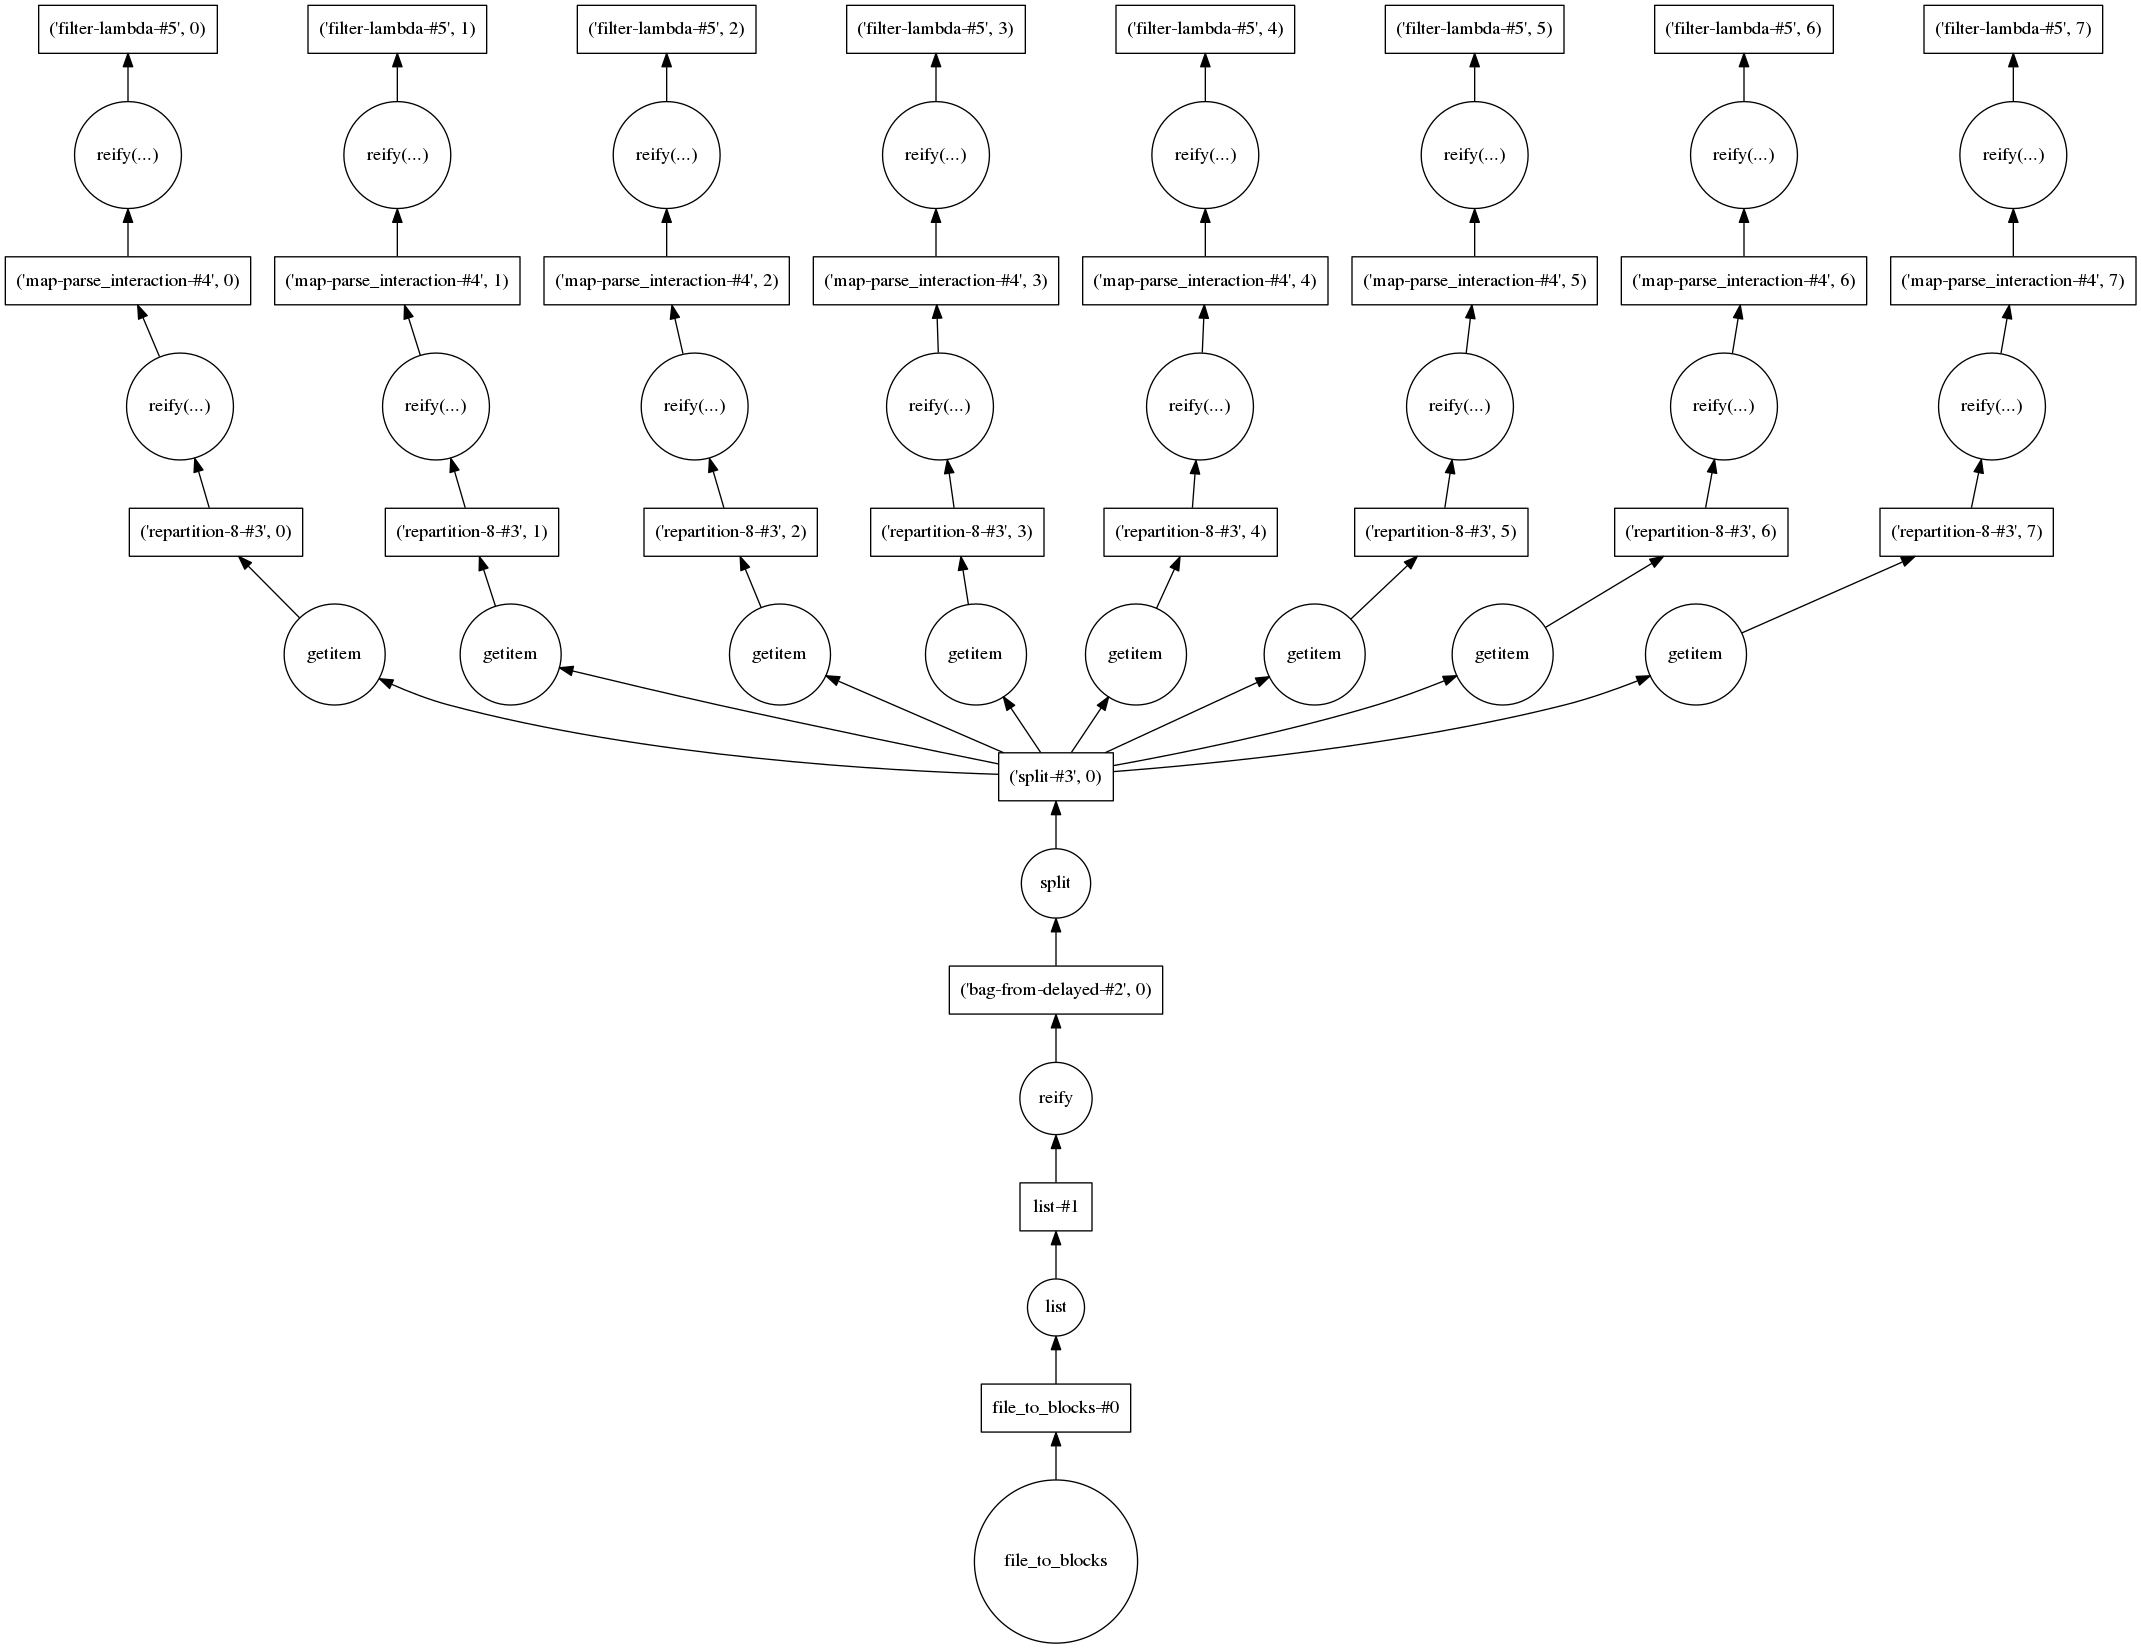

In [21]:
normal_key_interactions.visualize()

In [22]:
%load_ext version_information
%version_information dask

Software versions
Python 3.6.4 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.2.1
OS Linux 4.13.0 32 generic x86_64 with debian stretch sid
dask 0.17.0
Sat Feb 17 01:47:13 2018 CST